In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
year=session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
year



'2017-08-23'

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
data = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
DF = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= data).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
query = pd.DataFrame(DF,columns=['date','prcp'])
query.set_index('date', inplace= True)

# Sort the dataframe by date
query = query.sort_values(['date'])
query.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


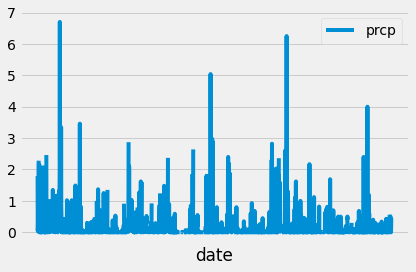

In [50]:
# Use Pandas Plotting with Matplotlib to plot the data

query.plot()
plt.xticks([])
plt.tight_layout()
plt.show()

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset

stations=session.query(measurement.station).distinct().count()
stations

9

In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active=session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
most_active = most_active[0]
most_active

('USC00519281', 2772)

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active[0]).all()
sel


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measurement.tobs).\
    filter(measurement.station == most_active[0]).\
    filter(measurement.date >= data).all()

active_station = pd.DataFrame(active_station, columns=["tobs"])
active_station.head()


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


AttributeError: 'Rectangle' object has no property 'bin'

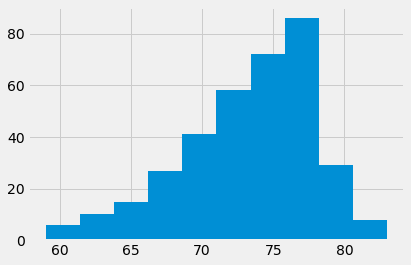

In [82]:
#plot the results as a histogram
active_station.plot.hist(bin=12)
plt.show()

In [ ]:
# Close Session
session.close()